In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from collections import Counter
from more_itertools import locate, seekable
from itertools import count

In [11]:
class pendulum:
    
    g = 9.81
    
    def __init__(self, angle, velocity, reward):
        
        length, weight =  1, 2
    
        self.length = length
        self.weight = weight
        self.angle = angle 
        self.velocity = velocity
        self.reward = reward
        
    #Getter and setter methods:
    
    def set_angle(self,theta):
        self.angle = theta
        
    def get_angle (self):
        return self.angle
        
    def set_velocity (self, omega):
        self.velocity = omega
        
    def get_velocity (self):
        return self.velocity
    
    def set_reward(self,r):
        self.angle = r
        
    def get_reward (self):
        return self.reward
    
    def get_state(self):
        return (self.angle, self.velocity, self.reward) 
    
    #Calculate the next step:
    
    def next_step (self, action, sigma = 15, dt = .02):
        
        if action not in [-4, 0, 4]:
            
            raise Exception('Invalid Action')
        
        perturb = np.random.normal(0, sigma)
        
        self.velocity += (self.g / self.length) * np.sin(self.angle) * dt
        
        self.velocity += ((action + perturb) / self.weight ) * dt
        
        self.angle += self.velocity * dt
        
        if np.abs(self.angle) > np.pi / 4:
        
            self.reward += -1
            
            self.velocity = 0
            
            self.angle = np.pi / 2 if self.angle > 0 \
                                   else - np.pi / 2
            
        return self
    
    def discretize (self, D1 = 50, D2 = 50):
    
        ang_disc = min(discrete_angles(D2), \
               key = lambda ang: abs(ang - self.get_angle()))
    
        vel_disc = min(discrete_velocities(D1), \
               key = lambda vel: abs(vel - self.get_velocity()))
    
        self.set_angle(ang_disc), self.set_velocity(vel_disc)
    
        return self

In [8]:
def discrete_angles (D2):
    
    return np.linspace(-np.pi/4,np.pi/4, D2)

def discrete_velocities(D1):
    
    return np.linspace(-3,3, D1)

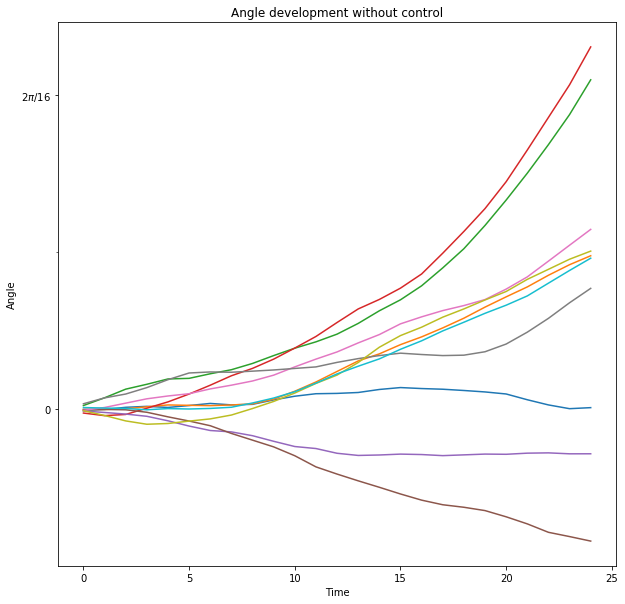

In [14]:
#Format for pi-like labels:

def format_func(value, tick_number):
    
    """
    Formats a given value into a multiple of pi
    @params:
    value: the value to be transformed
    """
    # find number of multiples of pi/16
    N = int(np.round(16 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/{0}$".format(16)
    elif N == 16:
        return r"$\pi$"
    elif N % 16 > 0:
        return r"${0}\pi/{1}$".format(N, 16)
    else:
        return r"${0}\pi$".format(N // 16)

def plot_angle (max_steps, reps):
    
    fig, ax = plt.subplots(figsize = (10,10))
    
    for rep in range(reps):
    
        pend, angles = pendulum(0,0,0), np.zeros(max_steps)
    
        time = 0
    
        while time < max_steps:
        
            pend.next_step(0)
        
            angles[time] = pend.get_angle()
        
            time += 1 
        
    
        ax.plot(angles)
        plt.title("Angle development without control")
        plt.xlabel("Time")
        plt.ylabel("Angle")
        
        #Set and format the labels
    
        ax.yaxis.set_major_locator\
        (plt.MultipleLocator(np.pi / 8))
        ax.yaxis.set_minor_locator\
        (plt.MultipleLocator(np.pi / 16))
        ax.yaxis.set_major_formatter\
        (plt.FuncFormatter(format_func))
        
    
plot_angle(25,10)

$\textbf{Part[b]: Discretization}$



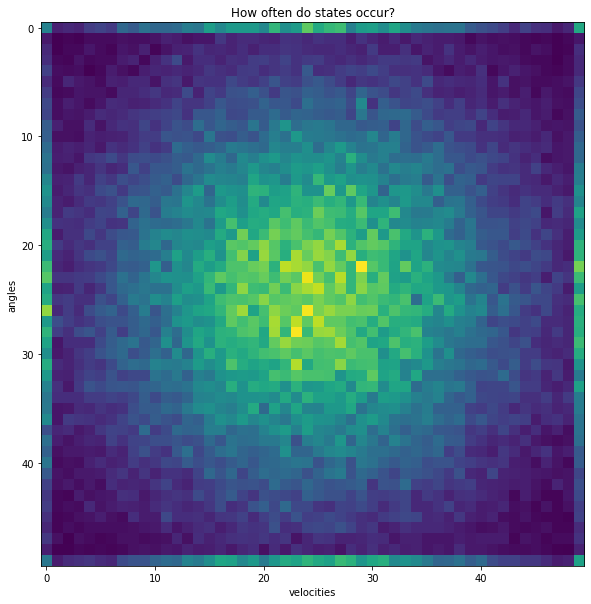

130.0


In [5]:
def plot_discrete_states (D1 = 50, D2 = 50):
    
    cov_matrix = np.eye(2) * \
                          np.array([np.pi / 8, 1.5])**2
    
    sample = np.random.multivariate_normal(np.zeros(2), \
                                           cov_matrix, \
                                           100000)
    
    dA, dV = discrete_angles(D2), discrete_velocities(D1)
    
    """
    Algorithm:
    1. Convert sample to pendulum-objects √
    2. Discretize pendula in the list     √
    3. Make a grid comprising all combinations  √
    4. Count the frequency of each state  √

    """
    
    pend = lambda x: pendulum(x[0],x[1],0).discretize().get_state()[:2]
    
    result = np.apply_along_axis(pend,1, sample)
    
    grid = np.zeros((D1, D2))
    
    for state in result:
        
        if state[0] in dA and state[1] in dV:
    
            grid[np.where(dA == state[0]), np.where(dV == state[1])] += 1
        
    fig, ax = plt.subplots(figsize = (10,10))
    
    ax.set_title("How often do states occur?")
    ax.set_xlabel("velocities")
    ax.set_ylabel("angles")
    im = ax.imshow(grid)
    plt.show()
    fig.colorbar(im, cax = ax)
    
    return grid, np.max(grid)

print(plot_discrete_states()[1])

$\textbf{Part [b]: Q-Learning}$

In [ ]:
def qlearn (D1, D2, epsilon, eta, gamma, max_steps = 2000):
    
    """
    Implements Q-learning with epsilon-greedy sampling policy 
    @params:
    D1, D2: discretization parameters
    eta: learning rate
    gamme: discount rate
    
    """
    
    
    
    

In [6]:
a = np.zeros(14)
a[4] = 1

b = [1,2,3,4,4,4,4,5,4]

for num in (np.unique(b)):
    
    print("The number {0} occurs {1} times in b".format(num, b.count(num)))
    
help(locate)
    

The number 1 occurs 1 times in b
The number 2 occurs 1 times in b
The number 3 occurs 1 times in b
The number 4 occurs 5 times in b
The number 5 occurs 1 times in b
Help on function locate in module more_itertools.more:

locate(iterable, pred=<class 'bool'>, window_size=None)
    Yield the index of each item in *iterable* for which *pred* returns
    ``True``.
    
    *pred* defaults to :func:`bool`, which will select truthy items:
    
        >>> list(locate([0, 1, 1, 0, 1, 0, 0]))
        [1, 2, 4]
    
    Set *pred* to a custom function to, e.g., find the indexes for a particular
    item.
    
        >>> list(locate(['a', 'b', 'c', 'b'], lambda x: x == 'b'))
        [1, 3]
    
    If *window_size* is given, then the *pred* function will be called with
    that many items. This enables searching for sub-sequences:
    
        >>> iterable = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
        >>> pred = lambda *args: args == (1, 2, 3)
        >>> list(locate(iterable, pred=pred, windo

In [7]:
help(ind)

NameError: name 'ind' is not defined